## Import necessary libraries


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Phase 2

In this Phase is performed an initial inspection of the dataset, to understand the structure, size and data types.

Load the dataset, and check the first 5 lines.

After a first look at the dataset, it helps to conclude that:
- columns are parsed corretly
- values look consistent
- the target variable ´cnt´ is available

In [23]:
# Load the dataset
df = pd.read_csv("hour.csv")


# Display first rows
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Check the shape of the dataset (Number of rows and columns)

In [24]:
# Dataset dimensions
df.shape

(17379, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Check for missing values in each column.
If there are missing values, they would need to be handel with impution or elimination.

In [27]:
# Missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

See if are duplicate rows in the dataset.


In [28]:
# Duplicated rows
df.duplicated().sum()

np.int64(0)

### Target variable
- cnt is defined as the total number of bike rentals per hour and will be used as the target.

### Columns excluded from features
Some columns should not be used as model inputs:

- instant: a sequential identifier with no predictive meaning.
- casual and registered: these represent components of the target, since  
  cnt = casual + registered.  
  Including them would introduce **data leakage**.

After removing these columns, the remaining variables are used as input features for the model.

In [29]:
df["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [30]:
cols_to_drop = ["instant", "casual", "registered"]
df = df.drop(columns=cols_to_drop, errors="ignore")

### Target Distribution 
We visualize the distribution of cnt to understand demand variability and to anticipate potential transformations or evaluation choices later

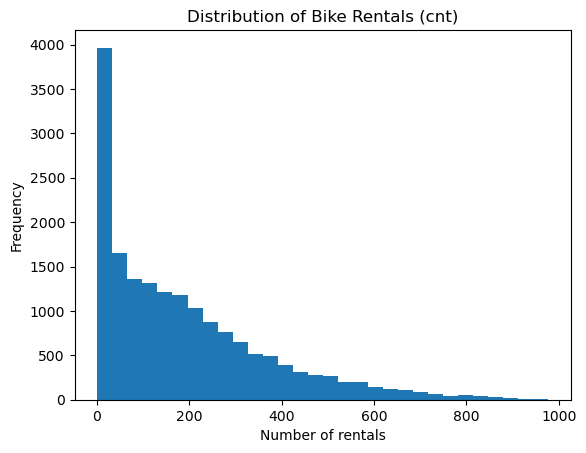

In [31]:
plt.figure()
plt.hist(df["cnt"], bins=30)
plt.title("Distribution of Bike Rentals (cnt)")
plt.xlabel("Number of rentals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df["dteday"] = pd.to_datetime(df["dteday"])

# Extract the day of the month as a numerical feature
df["day"] = df["dteday"].dt.day

# Remove the original date column to avoid non-numerical features
df = df.drop(columns=["dteday"])

# Phase 4 — Implementation & Experimentation
In this phase, the selected regression models are implemented and trained using a train/test split.  
Model performance is compared using MAE, RMSE, and R². Finally, a small hyperparameter exploration is performed for the Random Forest model.

### Define features (X) and target (y)
The target variable is cnt (total bike rentals per hour).  
All remaining columns are used as input features.

In [34]:
# Target variable
y = df["cnt"]

# Features
X = df.drop(columns=["cnt"])

### Train-test split
The dataset is split into training and testing sets. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((13903, 13), (3476, 13))

### Evaluation function
To ensure a fair comparison, all models are evaluated using the same metrics:
- MAE: average absolute error
- RMSE: penalizes larger errors
- R²: proportion of variance explained

In [ ]:
def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluate a regression model using MAE, RMSE and R².

    Returns a dict with metrics.
    """
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    # RMSE computed manually for compatibility across sklearn versions
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "RMSE": rmse, "R2": r2}

### Train and compare models
Three regression models are trained under the same train/test split:
1. Linear Regression (baseline)
2. Decision Tree Regressor
3. Random Forest Regressor

The goal is to compare model performance and identify the most suitable approach.

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_metrics = evaluate_regression_model(lr, X_test, y_test)
lr_metrics

{'MAE': 104.79088187855709,
 'RMSE': np.float64(139.19677260441358),
 'R2': 0.38811022229869707}

In [40]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_metrics = evaluate_regression_model(dt, X_test, y_test)
dt_metrics

{'MAE': 34.677215189873415,
 'RMSE': np.float64(60.070034883534824),
 'R2': 0.8860457218582002}

In [41]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_metrics = evaluate_regression_model(rf, X_test, y_test)
rf_metrics

{'MAE': 24.510881760644416,
 'RMSE': np.float64(41.380030751402956),
 'R2': 0.9459250054643801}

In [ ]:
# Results summary table
results = pd.DataFrame([
    {"Model": "Linear Regression", **lr_metrics},
    {"Model": "Decision Tree", **dt_metrics},
    {"Model": "Random Forest", **rf_metrics},
])

results

,Model,MAE,RMSE,R2
0,Linear Regression,104.790882,139.196773,0.388110
1,Decision Tree,34.677215,60.070035,0.886046
2,Random Forest,24.510882,41.380031,0.945925


### Random Forest hyperparameter exploration
After identifying Random Forest as the best-performing model in the initial comparison,  
a small experiment is performed to observe the impact of:
- number of trees (n_estimators)
- tree depth (max_depth)

This step helps confirm whether performance improves or degrades with different settings.

In [47]:
rf_params = [
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": None},
    {"n_estimators": 200, "max_depth": 15},
    {"n_estimators": 200, "max_depth": 10},
]

rf_results = []

for params in rf_params:
    rf = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        random_state=42,
        n_jobs=-1
    )

    # Train model
    rf.fit(X_train, y_train)

    # Evaluate model
    metrics = evaluate_regression_model(rf, X_test, y_test)

    # Store configuration + metrics
    metrics.update(params)
    rf_results.append(metrics)

    
rf_results_df = pd.DataFrame(rf_results)

# Display results ordered by RMSE (lower is better)
rf_results_df.sort_values("RMSE")

,MAE,RMSE,R2,n_estimators,max_depth
2,24.510882,41.380031,0.945925,200,NaN
1,24.612005,41.456456,0.945725,100,NaN
0,24.736053,41.495261,0.945623,50,NaN
3,25.021150,41.970417,0.944371,200,15.0
4,31.132090,50.150447,0.920574,200,10.0
